##### Challenge 1

Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

 * quadratic (second degree polynomial)
 * logarithmic (`log(x)`)

(The second one should fit really well, since it has the same form as the underlying model!)


In [149]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [150]:
B0 = 7
B1 = 3
X = pd.Series(list(random.randint(1,50) for i in range(250)))
y = pd.Series(B0 + B1*np.log(x) + 3*random.random() for x in X)
df = pd.DataFrame(index=range(250))
df['X'] = X
df['y'] = y
df.head()

,X,y
0,1,9.433788
1,27,17.430943
2,22,18.439527
3,16,17.425836
4,32,17.627636


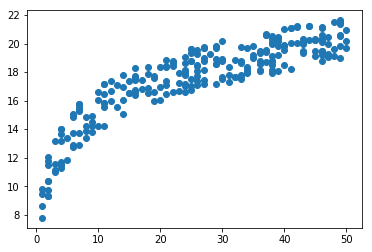

In [151]:
plt.scatter(X,y)

In [152]:
df['X_sq'] = df['X']**2

In [153]:
lm = LinearRegression()
lm.fit(df['X_sq'].values.reshape(-1,1),y)
lm.score(df['X_sq'].values.reshape(-1,1),y)

0.5863156584421179

In [154]:
lm.coef_

array([0.00286017])

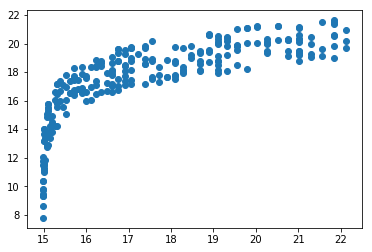

In [155]:
plt.scatter(lm.predict(df['X_sq'].values.reshape(-1,1)),y);

In [156]:
df['X_log'] = df['X'].apply(lambda x: np.log(x))

In [157]:
lm = LinearRegression()
lm.fit(df['X_log'].values.reshape(-1,1),y)
lm.score(df['X_log'].values.reshape(-1,1),y)

0.8964393993287405

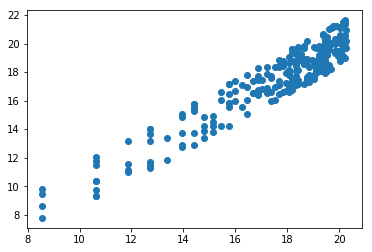

In [158]:
plt.scatter(lm.predict(df['X_log'].values.reshape(-1,1)),y);

##### Challenge 2

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)

In [159]:
B0 = 3
B1 = 7
B2 = 10
X = pd.Series(list(random.randint(1,50) for i in range(250)))
y = pd.Series(B0 + B1*x + B2*(x**2) + 5000*random.random() for x in X)
df = pd.DataFrame(index=range(250))
df['X'] = X
df['y'] = y
df.head()

,X,y
0,2,786.459741
1,47,24421.344068
2,26,10568.536075
3,18,7794.847736
4,37,16654.274193


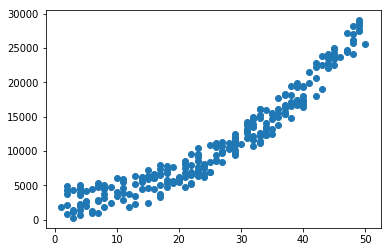

In [160]:
plt.scatter(X,y);

In [161]:
df['X_sq'] = df['X']**2

In [162]:
X_train, X_test, y_train, y_test = train_test_split(df[['X','X_sq']], y, test_size=0.25)

In [163]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_train,y_train)

0.9612558206622251

In [164]:
lm.score(X_test,y_test)

0.9673695671137095

In [165]:
lm.coef_

array([-57.07771671,  11.17598754])

In [166]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,lm.predict(X_train))

1984353.4686912317

In [167]:
mean_squared_error(y_test,lm.predict(X_test))

1725725.2524446114

##### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error
 * test error
 * R squared
 * AIC

In [224]:
from sklearn.preprocessing import PolynomialFeatures
def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

In [225]:


test_dict = {}
for i in range(8):
    poly = PolynomialFeatures(degree=i)
    lm.fit(poly.fit_transform(X_train),y_train)
    training_error = RMSE(y_train,lm.predict(poly.fit_transform(X_train)))
    test_error = RMSE(y_test,lm.predict(poly.fit_transform(X_test)))
    r_squared = lm.score(poly.fit_transform(X_test),y_test)
    
    test_dict[i] = [training_error,test_error,r_squared]
    


In [226]:
test_df = pd.DataFrame(test_dict)

In [227]:
test_df = test_df.transpose()

In [228]:
test_df.reset_index(inplace=True)

In [229]:
test_df

,index,0,1,2
0,0,7156.592421,7352.115664,-0.022059
1,1,1408.670816,1313.668624,0.967370
2,2,1393.287021,1323.173681,0.966896
3,3,1391.093065,1336.916349,0.966204
4,4,1366.067172,1353.630612,0.965354
5,5,1361.366069,1364.488716,0.964796
6,6,1394.245292,1366.897260,0.964672
7,7,1446.113707,1394.765658,0.963216


In [230]:
test_df.columns

Index(['index', 0, 1, 2], dtype='object')

In [231]:
test_df[['index',0]]

,index,0
0,0,7156.592421
1,1,1408.670816
2,2,1393.287021
3,3,1391.093065
4,4,1366.067172
5,5,1361.366069
6,6,1394.245292
7,7,1446.113707


Text(0.5,1,'Poly Degress vs R^2')

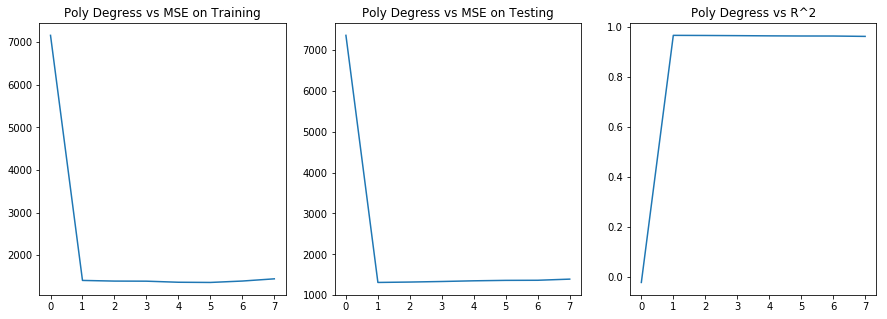

In [232]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(test_df['index'], test_df[0])
plt.title('Poly Degress vs RMSE on Training')
    
plt.subplot(1,3,2)
plt.plot(test_df['index'], test_df[1])
plt.title('Poly Degress vs RMSE on Testing')
    
plt.subplot(1,3,3)
plt.plot(test_df['index'], test_df[2])
plt.title('Poly Degress vs R^2')

##### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [ ]:
from sklearn.metrics import mean_squared_error
def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

In [233]:
B0 = 3
B1 = 7
B2 = 10
X = pd.Series(list(random.randint(1,50) for i in range(250)))
y = pd.Series(B0 + B1*x + B2*(x**2) + 5000*random.random() for x in X)
df = pd.DataFrame(index=range(250))
df['X'] = X
df['y'] = y
df['X_sq'] = df['X']**2
X_train, X_test, y_train, y_test = train_test_split(df[['X','X_sq']], y, test_size=0.25)

In [234]:
lc = {}
for m in range(5, len(X_train), 5):
    test_size = m
    lm = LinearRegression()
    lm.fit(X_train[:m+1],y_train[:m+1])
    train_error = RMSE(y_train,lm.predict(X_train))
    test_error = RMSE(y_test,lm.predict(X_test))
    lc[m] = {'Train Error': train_error, 'Test Error': test_error}

In [237]:
learning_df = pd.DataFrame(lc)

In [239]:
learning_df = learning_df.transpose()

In [241]:
learning_df.reset_index(inplace=True)

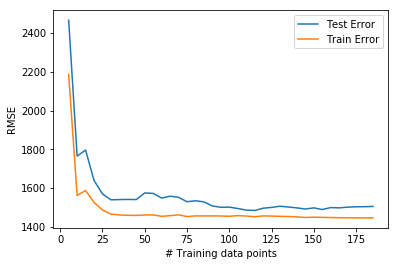

In [248]:
plt.plot(learning_df['index'],learning_df['Test Error'],label='Test Error')
plt.plot(learning_df['index'],learning_df['Train Error'],label='Train Error')
plt.xlabel('# Training data points')
plt.ylabel('RMSE')
plt.legend()